# Similarities and differences between Cartagena and Toronto

## 1. Install Libraries

In [ ]:
pip install beautifulsoup4

In [ ]:
pip install tabulate

In [ ]:
pip install lxml

In [ ]:
pip install geopy

In [ ]:
pip install folium

In [ ]:
pip install pgeocode

In [ ]:
pip install geocoder

In [ ]:
pip install opencage

In [ ]:
pip install html5lib

In [ ]:
pip install plotly

##  2. Import libraries

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import pgeocode
import folium
from geopy.geocoders import Nominatim
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geocoder
from opencage.geocoder import OpenCageGeocode
from lxml import html
import requests
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

## 3. Getting Main Categories based on Foursquare website

In [12]:
cat_foursquare=pd.DataFrame(columns = ['Category'],index=[])
cat_foursquare2=pd.DataFrame(columns = ['Id'],index=[])

In [105]:
res  = requests.get("https://developer.foursquare.com/docs/build-with-foursquare/categories")
soup = BeautifulSoup(res.content,'lxml')
for heading in soup.find_all(["h3"]):    #,"p"]):
    new_row = {'Category':heading.text.strip()}
    cat_foursquare=cat_foursquare.append(new_row, ignore_index=True)

string2=''
res2  = requests.get("https://developer.foursquare.com/docs/build-with-foursquare/categories")
soup2 = BeautifulSoup(res2.content,'lxml')
for heading2 in soup2.find_all(["p"]):    #,"p"]):
    string2 = heading2.text.strip()
    new_row2 = {'Id':string2[-25:]}
    cat_foursquare2=cat_foursquare2.append(new_row2, ignore_index=True)    

### 3.1. Venues Categories

In [106]:
cat_foursquare.head()

,Category
0,Arts & Entertainment
1,Amphitheater
2,Aquarium
3,Arcade
4,Art Gallery


### 3.2. Unique Id per category

In [110]:
cat_foursquare2.drop(index=[0,1],inplace=True)
cat_foursquare2.drop(["index"],axis=1,inplace=True)
cat_foursquare2=cat_foursquare2.reset_index()
cat_foursquare2.head()

,Id
0,4d4b7104d754a06370d81259
1,56aa371be4b08b9a8d5734db
2,4fceea171983d5d06c3e9823
3,4bf58dd8d48988d1e1931735
4,4bf58dd8d48988d1e2931735


### 3.3. Assign Id to each category

In [ ]:
cat_foursquare['Id']= cat_foursquare2['Id']
cat_foursquare

In [122]:
cat_foursquare=pd.read_csv('cat_foursquare2.csv')
cat_foursquare.head()

,Category,Id
0,Arts & Entertainment,4d4b7104d754a06370d81259
1,Amphitheater,56aa371be4b08b9a8d5734db
2,Aquarium,4fceea171983d5d06c3e9823
3,Arcade,4bf58dd8d48988d1e1931735
4,Art Gallery,4bf58dd8d48988d1e2931735


### 3.4. Assign label per category

In [123]:
cat_foursquare.loc[cat_foursquare['Category'] =='Arts & Entertainment', 'Main_Category'] = '1' 
cat_foursquare.loc[cat_foursquare['Category'] =='College & University', 'Main_Category'] = '2' 
cat_foursquare.loc[cat_foursquare['Category'] =='Event', 'Main_Category'] = '3' 
cat_foursquare.loc[cat_foursquare['Category'] =='Food', 'Main_Category'] = '4' 
cat_foursquare.loc[cat_foursquare['Category'] =='Nightlife Spot', 'Main_Category'] = '5' 
cat_foursquare.loc[cat_foursquare['Category'] =='Outdoors & Recreation', 'Main_Category'] = '6' 
cat_foursquare.loc[cat_foursquare['Category'] =='Professional & Other Places', 'Main_Category'] = '7' 
cat_foursquare.loc[cat_foursquare['Category'] =='Residence', 'Main_Category'] = '8' 
cat_foursquare.loc[cat_foursquare['Category'] =='Shop & Service', 'Main_Category'] = '9' 
cat_foursquare.loc[cat_foursquare['Category'] =='Travel & Transport', 'Main_Category'] = '10' 
cat_foursquare.shape

(941, 3)

In [124]:
cat_foursquare['Main_Category']=pd.to_numeric(cat_foursquare.Main_Category)
cat_foursquare2=cat_foursquare.loc[cat_foursquare['Main_Category']>0]
cat_foursquare2

,Category,Id,Main_Category
0,Arts & Entertainment,4d4b7104d754a06370d81259,1.0
65,College & University,4bf58dd8d48988d193941735,2.0
104,Event,4bf58dd8d48988d1ab941735,3.0
117,Food,52f2ab2ebcbc57f1066b8b54,4.0
466,Nightlife Spot,Supported countries: IT,5.0
491,Outdoors & Recreation,55a5a1ebe4b013909087cb83,6.0
599,Professional & Other Places,52e928d0bcbc57f1066b7e9c,7.0
707,Residence,4bf58dd8d48988d102941735,8.0
713,Shop & Service,4bf58dd8d48988d168941735,9.0
887,Travel & Transport,4bf58dd8d48988d132941735,10.0


### 3.5. Assign label per subcategory

In [ ]:
cat_foursquare['Main_Category']=pd.to_numeric(cat_foursquare.Main_Category)
cat_foursquare['Main_Category'][1:65]=1.1
cat_foursquare['Main_Category'][66:104]=2.1
cat_foursquare['Main_Category'][105:117]=3.1
cat_foursquare['Main_Category'][118:466]=4.1
cat_foursquare['Main_Category'][467:491]=5.1
cat_foursquare['Main_Category'][492:599]=6.1
cat_foursquare['Main_Category'][600:707]=7.1
cat_foursquare['Main_Category'][708:713]=8.1
cat_foursquare['Main_Category'][714:887]=9.1
cat_foursquare['Main_Category'][888:941]=10.1

In [126]:
cat_foursquare.tail()

,Category,Id,Main_Category
936,Train,4f04ae1f2fb6e1c99f3db0ba,10.1
937,Tram Station,52f2ab2ebcbc57f1066b8b2a,10.1
938,Transportation Service,52f2ab2ebcbc57f1066b8b2d,10.1
939,Travel Lounge,5744ccdfe4b0c0459246b4c7,10.1
940,Tunnel,4f4532974b9074f6e4fb0104,10.1


In [36]:
#cat_foursquare.to_csv(r'main_cat2.csv', index = False)
#cat_foursquare=pd.read_csv('main_cat2.csv')
cat_foursquare.shape

(941, 3)

## 4. Cartagena Dataframe

In [12]:
res  = requests.get("https://worldpostalcode.com/colombia/bolivar/cartagena")
soup = BeautifulSoup(res.content,'lxml')
places=soup.find_all( class_ = "place" )  

df = pd.DataFrame(places,columns = ['Neighborhood'])

df.shape

(161, 1)

### 4.1. Add "Latitude" and "Longitude" to dataframe df

In [15]:
key = 'bf95567df6b04b73acc716a9f97a07ba'
geocoder = OpenCageGeocode(key)
df["Latitude"]=""
df["Longitude"]=""
df.head()

,Neighborhood,Latitude,Longitude
0,Alameda La Victoria,,
1,Albornoz,,
2,Alcibia,,
3,Almirante Colon,,
4,Alto Bosque,,


In [19]:
for i in range(len(df)):     
    query = df.iloc[i][0]+",Cartagena,Colombia"
    results = geocoder.geocode(query)        
    df.iloc[i, 1]=results[0]['geometry']['lat']
    df.iloc[i, 2]=results[0]['geometry']['lng']  

In [13]:
#df.to_csv(r'cartagena_lat_long2.csv', index = False)
#df=pd.read_csv('cartagena_lat_long.csv')
df.shape

(161, 3)

In [14]:
df.head()

,Neighborhood,Latitude,Longitude
0,Alameda La Victoria,10.384171,-75.474273
1,Albornoz,10.371091,-75.506683
2,Alcibia,10.409521,-75.513908
3,Almirante Colon,10.386594,-75.495900
4,Alto Bosque,10.392617,-75.518503


### 4.2. Create a map with geopy library

In [15]:
address = 'Cartagena, CO'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cartagena City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cartagena City are 10.4195841, -75.5271224.


In [ ]:
# create map of New York using latitude and longitude values
map_ca = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'],df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ca)  
    
map_ca

### Define Foursquare credentials and version

In [ ]:
CLIENT_ID =''
CLIENT_SECRET =''

VERSION = '20180605' # Foursquare API version
LIMIT = 500 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

### 4.3. Explore neighborhoods in Cartagena - Getting Venue Id

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
                   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Id',            
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
cartagena_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

#### Let's check the size of the resulting dataframe

In [21]:
#cartagena_venues.to_csv(r'cartagena_venues3.csv', index = False)
#cartagena_venues=pd.read_csv('cartagena_venues3.csv')
cartagena_venues.shape

(2025, 8)

In [14]:
print('There are {} uniques categories.'.format(len(cartagena_venues['Venue Category'].unique())))
print('There are {} uniques venues.'.format(len(cartagena_venues['Venue'].unique())))

There are 164 uniques categories.
There are 626 uniques venues.


#### 4.3.1. Get unique values per Venue in Cartagena

In [15]:
ca_filtered = cartagena_venues.drop_duplicates(subset=['Venue'],keep='first')
ca_filtered.to_csv(r'ca_filtered2.csv', index = False)
ca_filtered.shape

(626, 8)

### 4.4 Get Likes - Cartagena

In [155]:
#cat_foursquare.to_csv(r'cat_foursquare2.csv', index = False)
cartagena_venues=pd.read_csv('ca_filtered2.csv')
cartagena_venues.shape

(626, 8)

#### Define Foursquare credentials and version

In [ ]:
CLIENT_ID =''
CLIENT_SECRET =''

VERSION = '20180605' # Foursquare API version
LIMIT = 500 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#### 4.4.1. Explore neighborhoods in Cartagena - Getting likes per venue

In [157]:
def getlikes(names,latitudes,longitudes,venueid,venue,vlatitudes,vlongitudes,vcategory,radius=500):
    
    venues_list=[]
    for nam,lat,lon,vid,ven,vla,vlo,vca in zip(names,latitudes,longitudes,venueid,venue,vlatitudes,vlongitudes,vcategory):
        #print(nam)
                   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/'+vid+'/likes?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            vla, 
            vlo, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['likes']
        
        # return only relevant information for each nearby venue
        if results['count']>0: 
            venues_list.append([( nam,lat,lon,vid,ven,vla,vlo,vca,results['count'],results['summary'] )])
        else:
            results['count']=0 
            results['summary']=0
            venues_list.append([( nam,lat,lon,vid,ven,vla,vlo,vca,results['count'],results['summary'] )])
        

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Id',            
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Count Likes',
                  'Venue Summary Likes']
    
    return(nearby_venues)

In [158]:
cartagena_venues_likes = getlikes(names=cartagena_venues['Neighborhood'],
                                  latitudes=cartagena_venues['Neighborhood Latitude'],
                                  longitudes=cartagena_venues['Neighborhood Longitude'],
                                  venueid=cartagena_venues['Venue Id'],
                                  venue=cartagena_venues['Venue'],
                                  vlatitudes=cartagena_venues['Venue Latitude'],
                                  vlongitudes=cartagena_venues['Venue Longitude'],
                                  vcategory=cartagena_venues['Venue Category']
                                 )

In [160]:
#cartagena_venues_likes.to_csv(r'cartagena_venues_likes.csv')
cartagena_venues_likes.shape

(626, 10)

In [130]:
cartagena_venues_likes.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Count Likes,Venue Summary Likes
0,0,Alameda La Victoria,10.384171,-75.474273,4f24bc3fe4b0eec7fe8b7ef5,El Tropezon,10.387691,-75.473635,Bar,6,6 Likes
1,1,Alameda La Victoria,10.384171,-75.474273,549503eb498e778f198bece7,Restaurante Anca Y Mar,10.387800,-75.473465,Seafood Restaurant,9,9 Likes
2,2,Alameda La Victoria,10.384171,-75.474273,4ed1207b754ad8083f23e667,Comidas Rápidas El York,10.387683,-75.473759,Fast Food Restaurant,6,6 Likes
3,3,Alameda La Victoria,10.384171,-75.474273,4f54b6b8e4b063296f7a3f9b,EDS Terpel San Buenaventura,10.384420,-75.469864,Gas Station,5,5 Likes
4,4,Alameda La Victoria,10.384171,-75.474273,50b6b70c498ea7a45b29a6ab,Cancha Sintetica Palogrande,10.384212,-75.470706,Soccer Field,1,1 Like


### 4.5. Assign main category per venue

In [95]:
cat_foursquare=pd.read_csv('main_cat2.csv')
cartagena_venues_likes=pd.read_csv('cartagena_venues_likes.csv')
#cartagena_venues_likes=pd.read_csv('test_ca.csv')
cartagena_df_final=cartagena_venues_likes
cartagena_df_final["Main_Category"]=""
cartagena_df_final.drop(["Unnamed: 0"],axis=1,inplace=True)
cartagena_df_final.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Count Likes,Venue Summary Likes,Main_Category
0,Alameda La Victoria,10.384171,-75.474273,4f24bc3fe4b0eec7fe8b7ef5,El Tropezon,10.387691,-75.473635,Bar,6,6 Likes,
1,Alameda La Victoria,10.384171,-75.474273,549503eb498e778f198bece7,Restaurante Anca Y Mar,10.387800,-75.473465,Seafood Restaurant,9,9 Likes,
2,Alameda La Victoria,10.384171,-75.474273,4ed1207b754ad8083f23e667,Comidas Rápidas El York,10.387683,-75.473759,Fast Food Restaurant,6,6 Likes,
3,Alameda La Victoria,10.384171,-75.474273,4f54b6b8e4b063296f7a3f9b,EDS Terpel San Buenaventura,10.384420,-75.469864,Gas Station,5,5 Likes,
4,Alameda La Victoria,10.384171,-75.474273,50b6b70c498ea7a45b29a6ab,Cancha Sintetica Palogrande,10.384212,-75.470706,Soccer Field,1,1 Like,


In [91]:
cat_foursquare.head()

,Category,Id,Main_Category
0,Arts & Entertainment,4d4b7104d754a06370d81259,1.0
1,Amphitheater,56aa371be4b08b9a8d5734db,1.1
2,Aquarium,4fceea171983d5d06c3e9823,1.1
3,Arcade,4bf58dd8d48988d1e1931735,1.1
4,Art Gallery,4bf58dd8d48988d1e2931735,1.1


In [96]:
for i, row in cartagena_df_final.iterrows():    
    for j,row in cat_foursquare.iterrows():    
        if cartagena_df_final["Venue Category"][i]==cat_foursquare['Category'][j]:
            cat_selected=round(cat_foursquare["Main_Category"][j])
            cartagena_df_final["Main_Category"][i]=cat_selected

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [98]:
for i, row in cartagena_df_final.iterrows():    
    for j,row in cat_foursquare.iterrows():    
        if cartagena_df_final["Main_Category"][i]==cat_foursquare['Main_Category'][j]:            
            cartagena_df_final["Main_Category"][i]=cat_foursquare['Category'][j]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [99]:
cartagena_df_final.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Count Likes,Venue Summary Likes,Main_Category
0,Alameda La Victoria,10.384171,-75.474273,4f24bc3fe4b0eec7fe8b7ef5,El Tropezon,10.387691,-75.473635,Bar,6,6 Likes,Nightlife Spot
1,Alameda La Victoria,10.384171,-75.474273,549503eb498e778f198bece7,Restaurante Anca Y Mar,10.387800,-75.473465,Seafood Restaurant,9,9 Likes,Food
2,Alameda La Victoria,10.384171,-75.474273,4ed1207b754ad8083f23e667,Comidas Rápidas El York,10.387683,-75.473759,Fast Food Restaurant,6,6 Likes,Food
3,Alameda La Victoria,10.384171,-75.474273,4f54b6b8e4b063296f7a3f9b,EDS Terpel San Buenaventura,10.384420,-75.469864,Gas Station,5,5 Likes,Shop & Service
4,Alameda La Victoria,10.384171,-75.474273,50b6b70c498ea7a45b29a6ab,Cancha Sintetica Palogrande,10.384212,-75.470706,Soccer Field,1,1 Like,Outdoors & Recreation


In [100]:
#cartagena_df_final.to_csv(r'cartagena_df_final.csv')
#cartagena_df_final.read_csv('cartagena_df_final.csv')

## 5. Toronto

In [42]:
res  = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'lxml')
table= soup.find_all('table')[0] 
df   = pd.read_html(str(table))
df   = pd.DataFrame(df[0])
df.shape

(180, 3)

#### Now, the dataframe df2 contains the information without "Not assigned" rows

In [ ]:
df2=df.query('Borough != "Not assigned" & Neighbourhood != "Not assigned"')


### 5.1. Add "Latitude" and "Longitude" to dataframe df

In [44]:
key = 'bf95567df6b04b73acc716a9f97a07ba'
geocoder = OpenCageGeocode(key)
df2["Latitude"]=""
df2["Longitude"]=""
df2.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M3A,North York,Parkwoods,,
3,M4A,North York,Victoria Village,,
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",,
5,M6A,North York,"Lawrence Manor, Lawrence Heights",,
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",,


In [16]:
for i in range(len(df2)):     
    query = df2.iloc[i][2]+",Toronto"
    results = geocoder.geocode(query)        
    df2.iloc[i, 3]=results[0]['geometry']['lat']
    df2.iloc[i, 4]=results[0]['geometry']['lng']  

In [13]:
#df2.to_csv(r'toronto_lat_long.csv', index = False)
df2=pd.read_csv('to_lat_long.csv')
df2.shape

(103, 5)

#### The dataframe "df2" does not have empty values

In [14]:
df2.isnull().sum()

Postal Code      0
Borough          0
Neighbourhood    0
Latitude         0
Longitude        0
dtype: int64

In [15]:
df2.tail()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.683410,-79.382900
99,M4Y,Downtown Toronto,Church and Wellesley,43.665524,-79.383801
100,M7Y,East Toronto,South Central Letter Processing Plant Toronto,43.780000,-79.251000
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea",43.636300,-79.498500
102,M8Z,Etobicoke,"Kingsway Park South West, Royal York South West",43.663280,-79.466170


### 5.2. Create a map with geopy library

In [17]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [ ]:
# create map of New York using latitude and longitude values
map_to = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_to)  
    
map_to

#### Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID =''
CLIENT_SECRET =''
VERSION = '20180605' # Foursquare API version
LIMIT = 5000 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

### 5.3. Explore neighborhoods in Toronto - Getting Venue Id

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],            
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
toronto_venues = getNearbyVenues(names=df2['Neighbourhood'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                  )

#### Let's check the size of the resulting dataframe

In [23]:
print(toronto_venues.shape)
toronto_venues.shape

(10213, 8)


(10213, 8)

In [24]:
toronto_venues.to_csv(r'toronto_venues.csv', index = False)
#toronto_venues=pd.read_csv('toronto_venues6.csv')

#### 5.3.1. Get unique values per Venue in Toronto

In [25]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))
print('There are {} uniques venues.'.format(len(toronto_venues['Venue'].unique())))

There are 240 uniques categories.
There are 1436 uniques venues.


In [42]:
to_filtered = toronto_venues.drop_duplicates(subset=['Venue'],keep='first')
to_filtered.to_csv(r'to_filtered2.csv', index = False)
to_filtered.shape

(1436, 8)

### 5.4. Get Likes - Toronto

#### Split dataframe to_filtered to get likes

In [14]:
to_filtered1=pd.read_csv('to_filtered1.csv')
to_filtered2=pd.read_csv('to_filtered2.csv')

#### Define Foursquare Credentials and Version

In [ ]:
LIENT_ID =''
LIENT_SECRET =''

VERSION = '20180605' # Foursquare API version
LIMIT = 5000 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#### 5.4.1. Explore neighborhoods in Toronto - Getting likes per venue

In [24]:
def getlikes(names,latitudes,longitudes,venueid,venue,vlatitudes,vlongitudes,vcategory,radius=5000):
    
    venues_list=[]
    for nam,lat,lon,vid,ven,vla,vlo,vca in zip(names,latitudes,longitudes,venueid,venue,vlatitudes,vlongitudes,vcategory):
        #rint(nam)
                   
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/'+vid+'/likes?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            vla, 
            vlo, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['likes']
        
        # return only relevant information for each nearby venue
        if results['count']>0: 
            venues_list.append([( nam,lat,lon,vid,ven,vla,vlo,vca,results['count'],results['summary'] )])
        else:
            results['count']=0 
            results['summary']=0
            venues_list.append([( nam,lat,lon,vid,ven,vla,vlo,vca,results['count'],results['summary'] )])
        

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Id',            
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Count Likes',
                  'Venue Summary Likes']
    
    return(nearby_venues)

In [20]:
toronto_venues_likesp1 = getlikes(names=to_filtered1['Neighborhood'],
                                  latitudes=to_filtered1['Neighborhood Latitude'],
                                  longitudes=to_filtered1['Neighborhood Longitude'],
                                  venueid=to_filtered1['Venue Id'],
                                  venue=to_filtered1['Venue'],
                                  vlatitudes=to_filtered1['Venue Latitude'],
                                  vlongitudes=to_filtered1['Venue Longitude'],
                                  vcategory=to_filtered1['Venue Category']
                                 )

In [22]:
toronto_venues_likesp1.to_csv(r'toronto_venues_likesp1.csv')
toronto_venues_likesp1.shape

(737, 10)

In [25]:
toronto_venues_likesp2 = getlikes(names=to_filtered2['Neighborhood'],
                                  latitudes=to_filtered2['Neighborhood Latitude'],
                                  longitudes=to_filtered2['Neighborhood Longitude'],
                                  venueid=to_filtered2['Venue Id'],
                                  venue=to_filtered2['Venue'],
                                  vlatitudes=to_filtered2['Venue Latitude'],
                                  vlongitudes=to_filtered2['Venue Longitude'],
                                  vcategory=to_filtered2['Venue Category']
                                 )

In [27]:
toronto_venues_likesp2.to_csv(r'toronto_venues_likesp2.csv')
toronto_venues_likesp2.shape

(699, 10)

In [30]:
toronto_venues_likesp1.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Count Likes,Venue Summary Likes
0,Parkwoods,43.75772,-79.315941,4b8991cbf964a520814232e3,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant,18,18 Likes
1,Parkwoods,43.75772,-79.315941,4bdccf4cafe8c9b6da285185,LCBO,43.757774,-79.314257,Liquor Store,15,15 Likes
2,Parkwoods,43.75772,-79.315941,4cd56bc194848cfa2b1ae6b1,Kostas Meat Market,43.760605,-79.301830,Greek Restaurant,17,17 Likes
3,Parkwoods,43.75772,-79.315941,500982f0e4b034274e8373e8,Naan & Kabob Halal,43.742903,-79.305148,Middle Eastern Restaurant,23,23 Likes
4,Parkwoods,43.75772,-79.315941,4dd19e051838a75196486487,Ghadir Mid-Eastern Grocery,43.743638,-79.304233,Grocery Store,9,9 Likes


### 5.5. Assign main category per venue

In [45]:
cat_foursquare=pd.read_csv('main_cat2.csv')
toronto_df_final=toronto_venues_likesp1
toronto_df_final=toronto_venues_likesp1.append(toronto_venues_likesp2,ignore_index = True) 
toronto_df_final["Main_Category"]=""
toronto_df_final.drop(["Unnamed: 0"],axis=1,inplace=True)
toronto_df_final.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Count Likes,Venue Summary Likes,Main_Category
0,Parkwoods,43.75772,-79.315941,4b8991cbf964a520814232e3,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant,18,18 Likes,
1,Parkwoods,43.75772,-79.315941,4bdccf4cafe8c9b6da285185,LCBO,43.757774,-79.314257,Liquor Store,15,15 Likes,
2,Parkwoods,43.75772,-79.315941,4cd56bc194848cfa2b1ae6b1,Kostas Meat Market,43.760605,-79.301830,Greek Restaurant,17,17 Likes,
3,Parkwoods,43.75772,-79.315941,500982f0e4b034274e8373e8,Naan & Kabob Halal,43.742903,-79.305148,Middle Eastern Restaurant,23,23 Likes,
4,Parkwoods,43.75772,-79.315941,4dd19e051838a75196486487,Ghadir Mid-Eastern Grocery,43.743638,-79.304233,Grocery Store,9,9 Likes,


In [48]:
cat_foursquare.shape

(941, 3)

In [49]:
for i, row in toronto_df_final.iterrows():    
    for j,row in cat_foursquare.iterrows():    
        if toronto_df_final["Venue Category"][i]==cat_foursquare['Category'][j]:
            to_selected=round(cat_foursquare["Main_Category"][j])
            toronto_df_final["Main_Category"][i]=to_selected

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [52]:
for i, row in toronto_df_final.iterrows():    
    for j,row in cat_foursquare.iterrows():    
        if toronto_df_final["Main_Category"][i]==cat_foursquare['Main_Category'][j]:            
            toronto_df_final["Main_Category"][i]=cat_foursquare['Category'][j]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [53]:
toronto_df_final.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Count Likes,Venue Summary Likes,Main_Category
1431,"Old Mill South, King's Mill Park, Sunnylea",43.6363,-79.4985,4b11a52ef964a5204b8123e3,Momiji Sushi Bar & Grill,43.647843,-79.508534,Sushi Restaurant,36,36 Likes,Food
1432,"Old Mill South, King's Mill Park, Sunnylea",43.6363,-79.4985,4bb7e2d498c7ef3b28883002,The Kingsway Theatre,43.647164,-79.512232,Indie Movie Theater,13,13 Likes,Arts & Entertainment
1433,"Old Mill South, King's Mill Park, Sunnylea",43.6363,-79.4985,511992d3e4b04d760b8ff836,Gourmet Bakery (Islington Station),43.644919,-79.524711,Bakery,11,11 Likes,Food
1434,"Old Mill South, King's Mill Park, Sunnylea",43.6363,-79.4985,4bcb9b5a68f976b0717e6183,Anatolia Restaurant,43.644596,-79.532810,Turkish Restaurant,55,55 Likes,Food
1435,"Old Mill South, King's Mill Park, Sunnylea",43.6363,-79.4985,543b1213498e97d631e83226,U-Know Sushi,43.630326,-79.485386,Sushi Restaurant,5,5 Likes,Food


In [54]:
toronto_df_final.to_csv(r'toronto_df_final.csv')
#toronto_df_final=pd.read_csv('toronto_df_final.csv')

## 6. Main Comparison between Cartagena and Toronto

### 6.1. Cartagena

In [12]:
cartagena_df_final=pd.read_csv('cartagena_df_final.csv')
cartagena_df_final.drop(["Unnamed: 0"],axis=1,inplace=True)

#### 6.1.1. Top 10 - Venues preferred per tourists

In [79]:
ca_sorted_per_venue = pd.DataFrame (cartagena_df_final, columns = ["Venue",'Venue Count Likes'])
#ca_sorted_per_venue=ca_sorted_per_venue.set_index(['Venue'])
ca_sorted_per_venue['Venue']=ca_sorted_per_venue['Venue'].astype(str)
ca_sorted_per_venue['Venue Count Likes']=ca_sorted_per_venue['Venue Count Likes'].astype(int)

ca_sorted_per_venue=ca_sorted_per_venue.sort_values(by=['Venue Count Likes'],ascending=False).reset_index()
ca_sorted_per_venue.drop(["index"],axis=1,inplace=True)
ca_sorted_per_venue.head()

,Venue,Venue Count Likes
0,Centro Histórico de Cartagena / Ciudad Amurallada,1799
1,Café del Mar,1231
2,Aeropuerto Internacional Rafael Núñez (CTG) (A...,1143
3,Castillo de San Felipe de Barajas,809
4,La Cevicheria,604


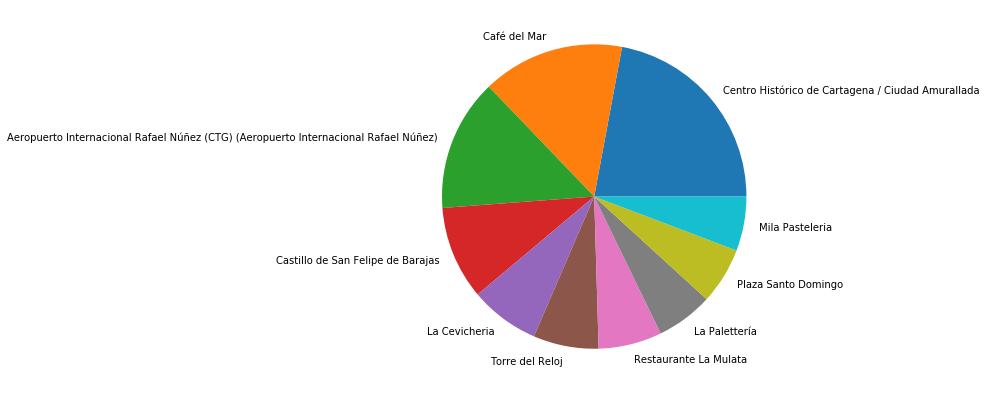

,Venue,Venue Count Likes
0,Centro Histórico de Cartagena / Ciudad Amurallada,1799
1,Café del Mar,1231
2,Aeropuerto Internacional Rafael Núñez (CTG) (A...,1143
3,Castillo de San Felipe de Barajas,809
4,La Cevicheria,604
5,Torre del Reloj,565
6,Restaurante La Mulata,549
7,La Palettería,491
8,Plaza Santo Domingo,490
9,Mila Pasteleria,470


In [83]:
# Creating plot 
fig1 = plt.figure(figsize =(10, 7))
car1=ca_sorted_per_venue[:10]
plt.pie(car1["Venue Count Likes"], labels =car1["Venue"]) 
  
# show plot 
plt.show() 
ca_sorted_per_venue.head(10)

#### 6.1.2. Top 10 - Neighborhoods preferred per tourists

In [16]:
ca_sorted_per_neighborhood0=cartagena_df_final
ca_sorted_per_neighborhood0.drop(["Neighborhood Latitude","Neighborhood Longitude","Venue Id","Venue","Venue Latitude","Venue Longitude","Venue Category","Venue Summary Likes","Main_Category"],axis=1,inplace=True)
ca_sorted_per_neighborhood1=ca_sorted_per_neighborhood0.groupby( ['Neighborhood'], as_index=False).agg({'Venue Count Likes':sum})
ca_sorted_per_neighborhood=ca_sorted_per_neighborhood1.sort_values(by=['Venue Count Likes'],ascending=False).reset_index()
ca_sorted_per_neighborhood.drop(["index"],axis=1,inplace=True)
ca_sorted_per_neighborhood.head()

,Neighborhood,Venue Count Likes
0,Centro,12406
1,Getsemani,2535
2,La Matuna,1809
3,El Laguito,1390
4,Crespo,1292


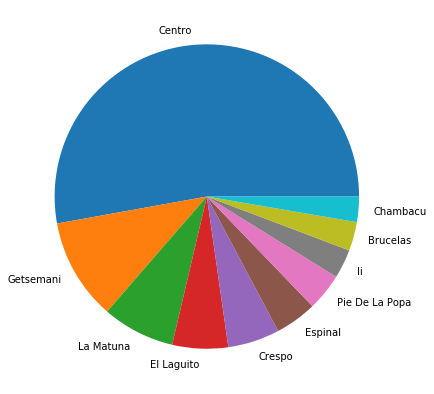

,Neighborhood,Venue Count Likes
0,Centro,12406
1,Getsemani,2535
2,La Matuna,1809
3,El Laguito,1390
4,Crespo,1292
5,Espinal,1043
6,Pie De La Popa,930
7,Ii,723
8,Brucelas,720
9,Chambacu,632


In [17]:
# Creating plot 
fig2 = plt.figure(figsize =(10, 7))
car2=ca_sorted_per_neighborhood[:10]
plt.pie(car2["Venue Count Likes"], labels =car2["Neighborhood"]) 
  
# show plot 
plt.show() 
ca_sorted_per_neighborhood.head(10)

### 6.2. Toronto

In [12]:
toronto_df_final=pd.read_csv('toronto_df_final.csv')
toronto_df_final.drop(["Unnamed: 0"],axis=1,inplace=True)

#### 6.2.1. Top 10 - Venues preferred per tourists

In [18]:
to_sorted_per_venue = pd.DataFrame (toronto_df_final, columns = ["Venue",'Venue Count Likes'])
#to_sorted_per_venue=to_sorted_per_venue.set_index(['Venue'])
to_sorted_per_venue['Venue']=to_sorted_per_venue['Venue'].astype(str)
to_sorted_per_venue['Venue Count Likes']=to_sorted_per_venue['Venue Count Likes'].astype(int)

to_sorted_per_venue=to_sorted_per_venue.sort_values(by=['Venue Count Likes'],ascending=False).reset_index()
to_sorted_per_venue.drop(["index"],axis=1,inplace=True)
to_sorted_per_venue.head()

,Venue,Venue Count Likes
0,Toronto Pearson International Airport (YYZ) (T...,4177
1,Rogers Centre,2220
2,Scotiabank Arena,2203
3,CN Tower,2007
4,Yorkdale Shopping Centre,1545


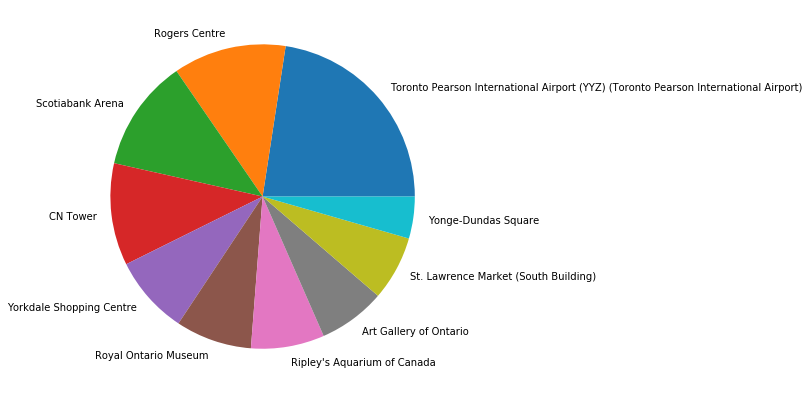

,Venue,Venue Count Likes
0,Toronto Pearson International Airport (YYZ) (T...,4177
1,Rogers Centre,2220
2,Scotiabank Arena,2203
3,CN Tower,2007
4,Yorkdale Shopping Centre,1545
5,Royal Ontario Museum,1497
6,Ripley's Aquarium of Canada,1443
7,Art Gallery of Ontario,1317
8,St. Lawrence Market (South Building),1269
9,Yonge-Dundas Square,823


In [20]:
# Creating plot 
fig3 = plt.figure(figsize =(10, 7))
car3=to_sorted_per_venue[:10]
plt.pie(car3["Venue Count Likes"], labels =car3["Venue"]) 
  
# show plot 
plt.show() 
to_sorted_per_venue.head(10)

#### 6.2.2. Top 10 - Neighborhoods preferred per tourists

In [22]:
to_sorted_per_neighborhood0=toronto_df_final
to_sorted_per_neighborhood0.drop(["Neighborhood Latitude","Neighborhood Longitude","Venue Id","Venue","Venue Latitude","Venue Longitude","Venue Category","Venue Summary Likes","Main_Category"],axis=1,inplace=True)
to_sorted_per_neighborhood1=to_sorted_per_neighborhood0.groupby( ['Neighborhood'], as_index=False).agg({'Venue Count Likes':sum})
to_sorted_per_neighborhood=to_sorted_per_neighborhood1.sort_values(by=['Venue Count Likes'],ascending=False).reset_index()
to_sorted_per_neighborhood.drop(["index"],axis=1,inplace=True)
to_sorted_per_neighborhood.head()

,Neighborhood,Venue Count Likes
0,"Regent Park, Harbourfront",25662
1,"Northwest, West Humber - Clairville",5194
2,"Queen's Park, Ontario Provincial Government",5079
3,"Lawrence Manor, Lawrence Heights",4608
4,Woodbine Heights,4452


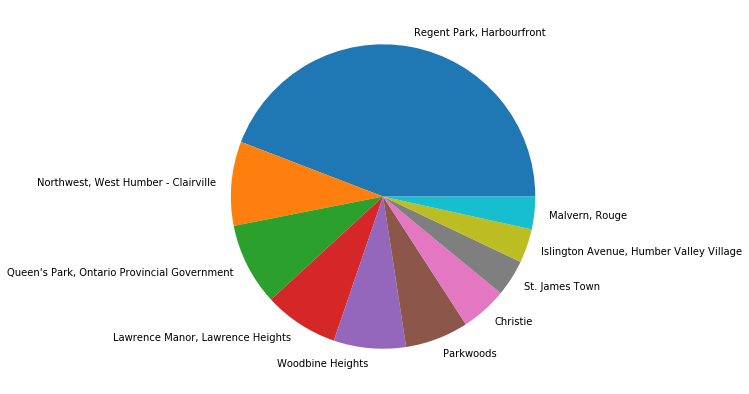

,Neighborhood,Venue Count Likes
0,"Regent Park, Harbourfront",25662
1,"Northwest, West Humber - Clairville",5194
2,"Queen's Park, Ontario Provincial Government",5079
3,"Lawrence Manor, Lawrence Heights",4608
4,Woodbine Heights,4452
5,Parkwoods,3911
6,Christie,2846
7,St. James Town,2258
8,"Islington Avenue, Humber Valley Village",2096
9,"Malvern, Rouge",2011


In [24]:
# Creating plot 
fig4 = plt.figure(figsize =(10, 7))
car4=to_sorted_per_neighborhood[:10]
plt.pie(car4["Venue Count Likes"], labels =car4["Neighborhood"]) 
  
# show plot 
plt.show() 
to_sorted_per_neighborhood.head(10)

### 6.3. Comparison between main categories

In [62]:
cartagena_df_final=pd.read_csv('cartagena_df_final.csv')
toronto_df_final=pd.read_csv('toronto_df_final.csv')
cartagena_df_final.drop(["Unnamed: 0"],axis=1,inplace=True)
toronto_df_final.drop(["Unnamed: 0"],axis=1,inplace=True)

In [69]:
ca_categories0=cartagena_df_final
ca_categories0.drop(["Neighborhood","Neighborhood Latitude","Neighborhood Longitude","Venue Id","Venue","Venue Latitude","Venue Longitude","Venue Category","Venue Count Likes","Venue Summary Likes"],axis=1,inplace=True)
ca_categories0["Count Categories"]=1
ca_categories0['Count Categories']=ca_categories0['Count Categories'].astype(int)
ca_categories1=ca_categories0.groupby( ['Main_Category'], as_index=False).agg({'Count Categories':sum})
ca_categories=ca_categories1.sort_values(by=['Count Categories'],ascending=False).reset_index()
ca_categories.drop(["index"],axis=1,inplace=True)
#ca_categories=ca_categories.set_index(["Main_Category"])
ca_categories.rename(columns = {'Count Categories':'Cartagena'}, inplace = True)
ca_categories

,Main_Category,Cartagena
0,Food,269
1,Shop & Service,95
2,Travel & Transport,91
3,Outdoors & Recreation,65
4,Nightlife Spot,57
5,Arts & Entertainment,43
6,Professional & Other Places,5
7,Residence,1


In [70]:
to_categories0=toronto_df_final
to_categories0.drop(["Neighborhood","Neighborhood Latitude","Neighborhood Longitude","Venue Id","Venue","Venue Latitude","Venue Longitude","Venue Category","Venue Count Likes","Venue Summary Likes"],axis=1,inplace=True)
to_categories0["Count Categories"]=1
to_categories0['Count Categories']=to_categories0['Count Categories'].astype(int)
to_categories1=to_categories0.groupby( ['Main_Category'], as_index=False).agg({'Count Categories':sum})
to_categories=to_categories1.sort_values(by=['Count Categories'],ascending=False).reset_index()
to_categories.drop(["index"],axis=1,inplace=True)
#to_categories=to_categories.set_index(["Main_Category"])
to_categories.rename(columns = {'Count Categories':'Toronto'}, inplace = True)
to_categories

,Main_Category,Toronto
0,Food,821
1,Shop & Service,237
2,Outdoors & Recreation,194
3,Nightlife Spot,77
4,Arts & Entertainment,61
5,Travel & Transport,39
6,Professional & Other Places,5
7,College & University,1


In [73]:
comp_categories_inner=pd.merge(ca_categories, to_categories, on = "Main_Category", how = "inner") 
comp_categories_inner

,Main_Category,Cartagena,Toronto
0,Food,269,821
1,Shop & Service,95,237
2,Travel & Transport,91,39
3,Outdoors & Recreation,65,194
4,Nightlife Spot,57,77
5,Arts & Entertainment,43,61
6,Professional & Other Places,5,5


In [75]:
comp_categories_final=comp_categories_inner.set_index(["Main_Category"])
comp_categories_final

,Cartagena,Toronto
Main_Category,,
Food,269,821
Shop & Service,95,237
Travel & Transport,91,39
Outdoors & Recreation,65,194
Nightlife Spot,57,77
Arts & Entertainment,43,61
Professional & Other Places,5,5


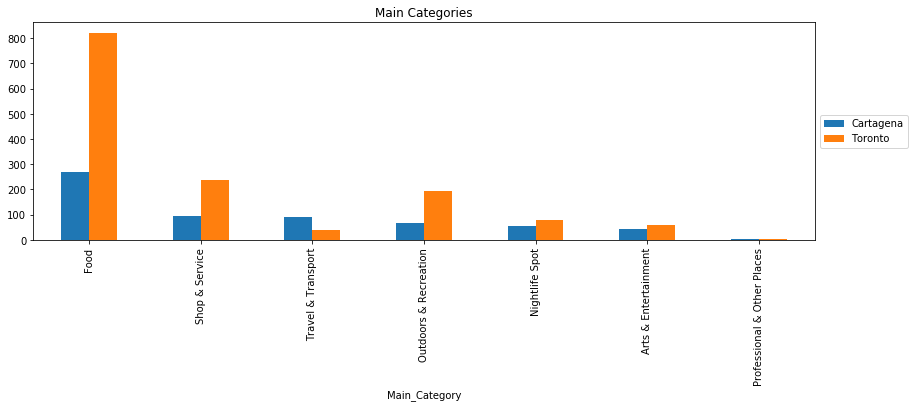

,Cartagena,Toronto
Main_Category,,
Food,269,821
Shop & Service,95,237
Travel & Transport,91,39
Outdoors & Recreation,65,194
Nightlife Spot,57,77
Arts & Entertainment,43,61
Professional & Other Places,5,5


In [76]:
d_ca_fi = comp_categories_final
f_ca_fi = plt.figure()
plt.title('Main Categories', color='black')
d_ca_fi.plot(kind='bar', ax=f_ca_fi.gca(),figsize=(14,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
comp_categories_final

### 6.4. Comparison between venues

In [7]:
ca_comp=pd.read_csv('cartagena_df_final.csv')
to_comp=pd.read_csv('toronto_df_final.csv')
ca_comp.drop(["Unnamed: 0"],axis=1,inplace=True)
to_comp.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
to_comp.drop(["Neighborhood","Neighborhood Latitude","Neighborhood Longitude","Venue Id","Venue","Venue Latitude","Venue Longitude","Venue Count Likes","Venue Summary Likes","Main_Category"],axis=1,inplace=True)
ca_comp.drop(["Neighborhood","Neighborhood Latitude","Neighborhood Longitude","Venue Id","Venue","Venue Latitude","Venue Longitude","Venue Count Likes","Venue Summary Likes","Main_Category"],axis=1,inplace=True)

In [ ]:
ca_comp1 = ca_comp.drop_duplicates(subset=['Venue Category'],keep='first')
to_comp1 = to_comp.drop_duplicates(subset=['Venue Category'],keep='first')

#### 6.4.1. Common venues between Cartagena and Toronto

In [23]:
comp_final = to_comp1.merge(ca_comp1, how = 'inner' ,indicator=False)
comp_final.shape

(108, 1)

In [33]:
comp_final.head(10)

,Venue Category
0,Caribbean Restaurant
1,Liquor Store
2,Middle Eastern Restaurant
3,Grocery Store
4,Supermarket
5,Café
6,Sushi Restaurant
7,Thai Restaurant
8,Mediterranean Restaurant
9,Burger Joint


#### 6.4.2. Venues in Toronto which are not available in Cartagena

In [28]:
comp2 = to_comp1.merge(ca_comp1, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='left_only']
comp2.shape

(131, 2)

In [32]:
comp2.head(10)

,Venue Category,_merge
2,Greek Restaurant,left_only
5,Vietnamese Restaurant,left_only
6,Falafel Restaurant,left_only
9,Discount Store,left_only
15,Event Space,left_only
16,Golf Course,left_only
19,Burrito Place,left_only
20,Fish Market,left_only
23,Korean Restaurant,left_only
25,Health & Beauty Service,left_only


#### 6.4.3. Venues in Cartagena which are not available in Toronto

In [30]:
comp3 = to_comp1.merge(ca_comp1, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']
comp3.shape

(56, 2)

In [31]:
comp3.head(10)

,Venue Category,_merge
239,Doctor's Office,right_only
240,Bus Stop,right_only
241,Recording Studio,right_only
242,Moving Target,right_only
243,Motel,right_only
244,Pier,right_only
245,Baseball Field,right_only
246,Boat or Ferry,right_only
247,Beer Garden,right_only
248,Home Service,right_only


In [52]:
comp_plot = pd.DataFrame(
    {'Differences and Similarities':[108, 131, 56]}, 
    index=['Similarities', 'Unique Venues in Toronto', 'Unique Venues in Cartagena'])

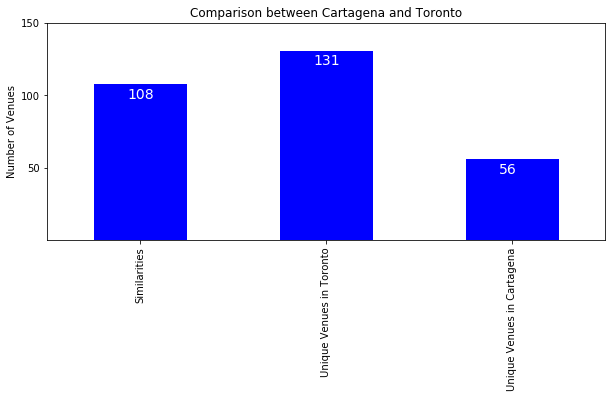

In [61]:
ax = comp_plot['Differences and Similarities'].plot(kind='bar', figsize=(10,4),
                                                  color="blue");#, fontsize=13);
#ax.set_alpha(0.8)
ax.set_title("Comparison between Cartagena and Toronto")#, fontsize=18)
ax.set_ylabel("Number of Venues");#, fontsize=18);
ax.set_yticks([50,100,150])

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.18, i.get_height()-10, \
            str(round((i.get_height()))), fontsize=14,color='white')

## 7. Monthly weather averages

In [12]:
res  = requests.get("https://www.weather2visit.com/south-america/colombia/cartagena.htm")
soup = BeautifulSoup(res.content,'lxml')

table= soup.find_all('table')[0] 
df_c0   = pd.read_html(str(table))
df_c0   = pd.DataFrame(df_c0[0])

table= soup.find_all('table')[1] 
df_c1   = pd.read_html(str(table))
df_c1   = pd.DataFrame(df_c1[0])

table= soup.find_all('table')[2] 
df_c2   = pd.read_html(str(table))
df_c2   = pd.DataFrame(df_c2[0])

table= soup.find_all('table')[3] 
df_c3   = pd.read_html(str(table))
df_c3   = pd.DataFrame(df_c3[0])

table= soup.find_all('table')[4] 
df_c4   = pd.read_html(str(table))
df_c4   = pd.DataFrame(df_c4[0])

table= soup.find_all('table')[5] 
df_c5   = pd.read_html(str(table))
df_c5   = pd.DataFrame(df_c5[0])

table= soup.find_all('table')[6] 
df_c6   = pd.read_html(str(table))
df_c6   = pd.DataFrame(df_c6[0])

In [13]:
res  = requests.get("https://www.weather2visit.com/north-america/canada/toronto.htm")
soup = BeautifulSoup(res.content,'lxml')

table= soup.find_all('table')[0] 
df_t0   = pd.read_html(str(table))
df_t0   = pd.DataFrame(df_t0[0])

table= soup.find_all('table')[1] 
df_t1   = pd.read_html(str(table))
df_t1   = pd.DataFrame(df_t1[0])

table= soup.find_all('table')[2] 
df_t2   = pd.read_html(str(table))
df_t2   = pd.DataFrame(df_t2[0])

table= soup.find_all('table')[3] 
df_t3   = pd.read_html(str(table))
df_t3   = pd.DataFrame(df_t3[0])

table= soup.find_all('table')[4] 
df_t4   = pd.read_html(str(table))
df_t4   = pd.DataFrame(df_t4[0])

table= soup.find_all('table')[5] 
df_t5   = pd.read_html(str(table))
df_t5   = pd.DataFrame(df_t5[0])

table= soup.find_all('table')[6] 
df_t6   = pd.read_html(str(table))
df_t6   = pd.DataFrame(df_t6[0])

### 7.1. Average Day Temperature

In [75]:
df_c0.drop(index=[1], inplace=True)
df_t0.drop(index=[1], inplace=True)

In [76]:
amt = df_c0.append(df_t0, ignore_index=True)
amt.rename(index={0:"Cartagena"},inplace=True)
amt.rename(index={1:"Toronto"},inplace=True)
amt.drop("Unnamed: 0", axis=1,inplace=True)

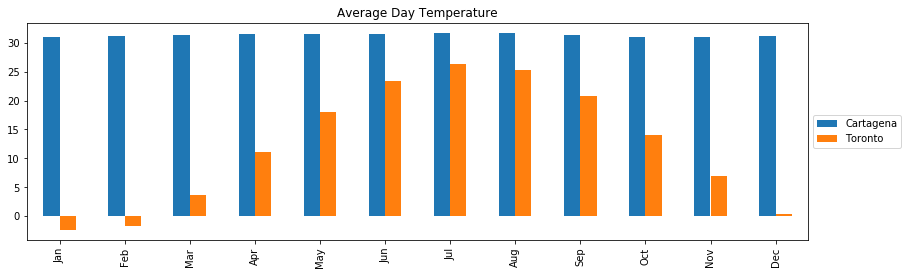

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Cartagena,31.1,31.2,31.4,31.6,31.6,31.6,31.8,31.7,31.4,31.0,31.1,31.2
Toronto,-2.5,-1.7,3.6,11.1,18.1,23.4,26.3,25.3,20.8,14.0,6.9,0.3


In [78]:
d = amt.T
f = plt.figure()
plt.title('Average Day Temperature', color='black')
d.plot(kind='bar', ax=f.gca(),figsize=(14,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
amt

### 7.2. Average rainfall and Rainy days

In [16]:
df_c1.drop(index=[1], inplace=True)
df_t1.drop(index=[1], inplace=True)

In [17]:
amt1 = df_c1.append(df_t1, ignore_index=True)
amt1.rename(index={0:"Cartagena: 'mm'"},inplace=True)
amt1.rename(index={1:"Cartagena: Rainy days"},inplace=True)
amt1.rename(index={2:"Toronto 'mm'"},inplace=True)
amt1.rename(index={3:"Toronto: Rainy days"},inplace=True)
amt1.drop("Unnamed: 0", axis=1,inplace=True)

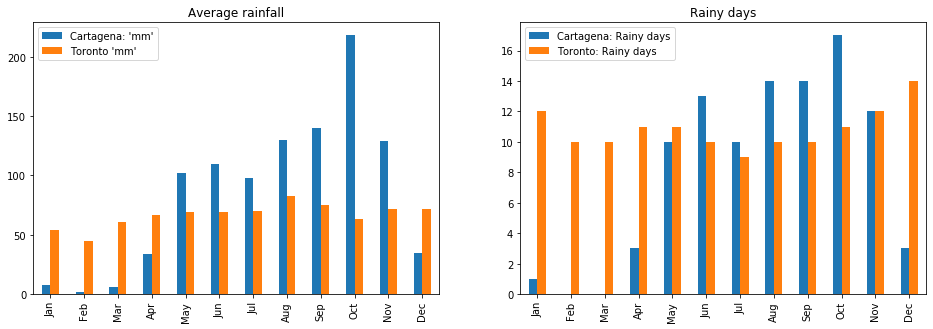

In [21]:
d2=amt1.T
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16,5))
d2[["Cartagena: 'mm'","Toronto 'mm'"]].plot(ax=axes[0], kind='bar',title='Average rainfall')
d2[["Cartagena: Rainy days", "Toronto: Rainy days"]].plot(ax=axes[1], kind='bar',title='Rainy days')

### 7.3. Average daily sunshine

In [19]:
amt2 = df_c2.append(df_t2, ignore_index=True)
amt2.rename(index={0:"Cartagena"},inplace=True)
amt2.rename(index={1:"Toronto"},inplace=True)
amt2.drop("Unnamed: 0", axis=1,inplace=True)

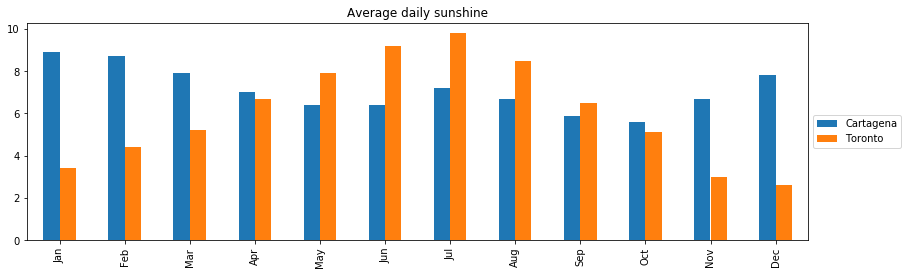

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Cartagena,8.9,8.7,7.9,7.0,6.4,6.4,7.2,6.7,5.9,5.6,6.7,7.8
Toronto,3.4,4.4,5.2,6.7,7.9,9.2,9.8,8.5,6.5,5.1,3.0,2.6


In [26]:
d3 = amt2.T
f3 = plt.figure()
plt.title('Average daily sunshine', color='black')
d3.plot(kind='bar', ax=f3.gca(),figsize=(14,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
amt2

### 7.4. Average day / night temperatures (°C)

In [28]:
df_c3.drop(index=[2], inplace=True)
df_c3.drop(index=[3], inplace=True)
df_t3.drop(index=[2], inplace=True)
df_t3.drop(index=[3], inplace=True)

In [31]:
amt3 = df_c3.append(df_t3, ignore_index=True)
amt3.rename(index={0:"Cartagena: 'Min °C'"},inplace=True)
amt3.rename(index={1:"Cartagena: 'Max °C'"},inplace=True)
amt3.rename(index={2:"Toronto 'Min °C'"},inplace=True)
amt3.rename(index={3:"Toronto: 'Max °C'"},inplace=True)
amt3.drop("Unnamed: 0", axis=1,inplace=True)

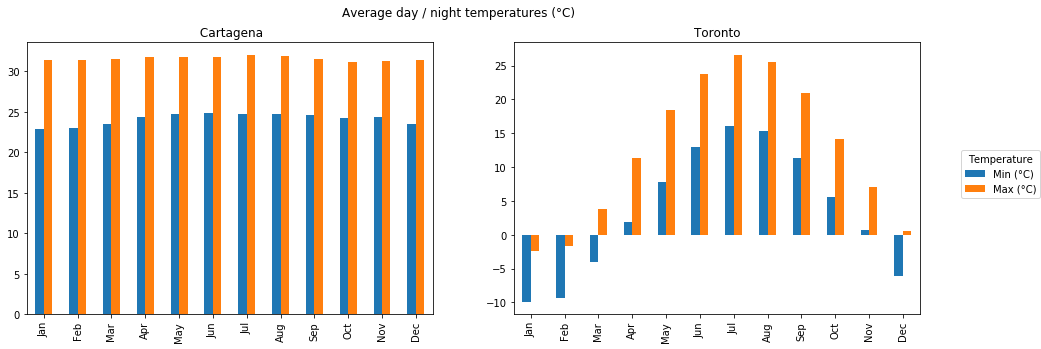

In [69]:
d4=amt3.T
fig, axes = plt.subplots(1,2,figsize=(16,5))
fig.suptitle('Average day / night temperatures (°C)')
d4[["Cartagena: 'Min °C'","Cartagena: 'Max °C'"]].plot(ax=axes[0], kind='bar',title=' Cartagena',legend=False)
d4[["Toronto 'Min °C'", "Toronto: 'Max °C'"]].plot(ax=axes[1], kind='bar',title='Toronto',legend=False)
fig.legend(#[l1, l2],     # The line objects
           labels=["Min (°C)", "Max (°C)"],   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Temperature")  # Title for the legend

### 7.5. Average monthly sea temperature

In [71]:
df_c4.drop(index=[1], inplace=True)
df_t4.drop(index=[1], inplace=True)

In [74]:
amt4=df_c4.append(df_t4, ignore_index=True)
amt4.rename(index={0:"Cartagena"},inplace=True)
amt4.rename(index={1:"Toronto"},inplace=True)
amt4.drop("Unnamed: 0", axis=1,inplace=True)

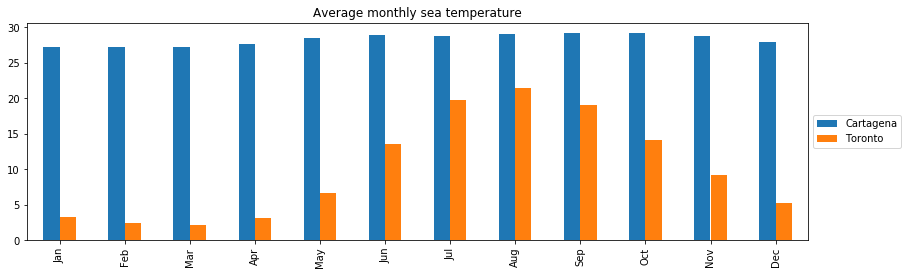

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Cartagena,27.3,27.2,27.2,27.6,28.5,29.0,28.8,29.1,29.2,29.2,28.8,28.0
Toronto,3.3,2.4,2.1,3.1,6.7,13.5,19.7,21.4,19.1,14.1,9.2,5.3


In [77]:
d5 = amt4.T
f5 = plt.figure()
plt.title('Average monthly sea temperature', color='black')
d5.plot(kind='bar', ax=f5.gca(),figsize=(14,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
amt4

### 7.6. Average wind speed

In [79]:
df_c5.drop(index=[1], inplace=True)
df_t5.drop(index=[1], inplace=True)

In [82]:
amt5=df_c5.append(df_t5, ignore_index=True)
amt5.rename(index={0:"Cartagena"},inplace=True)
amt5.rename(index={1:"Toronto"},inplace=True)
amt5.drop("Unnamed: 0", axis=1,inplace=True)

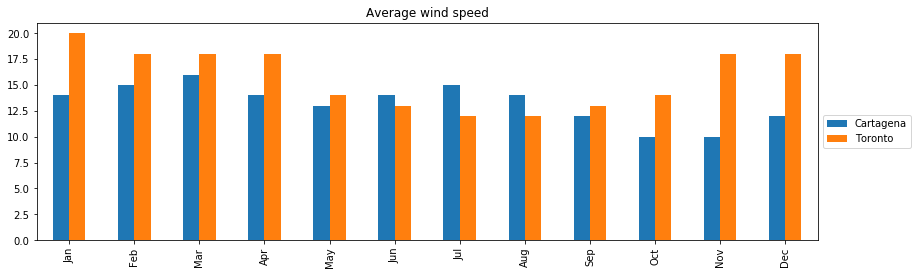

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Cartagena,14,15,16,14,13,14,15,14,12,10,10,12
Toronto,20,18,18,18,14,13,12,12,13,14,18,18


In [85]:
d6 = amt5.T
f6 = plt.figure()
plt.title('Average wind speed', color='black')
d6.plot(kind='bar', ax=f6.gca(),figsize=(14,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
amt5

### 7.7. Relative percentage humidity

In [92]:
amt6=df_c6.append(df_t6, ignore_index=True)
amt6.rename(index={0:"Cartagena"},inplace=True)
amt6.rename(index={1:"Toronto"},inplace=True)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Cartagena,80%,79%,78%,80%,82%,82%,81%,82%,83%,83%,83%,82%
Toronto,79%,78%,76%,69%,68%,70%,70%,74%,77%,78%,81%,82%


In [98]:
amt6['Jan']=amt6['Jan'].str.extract(r'(^\d*)')
amt6['Feb']=amt6['Feb'].str.extract(r'(^\d*)')
amt6['Mar']=amt6['Mar'].str.extract(r'(^\d*)')
amt6['Apr']=amt6['Apr'].str.extract(r'(^\d*)')
amt6['May']=amt6['May'].str.extract(r'(^\d*)')
amt6['Jun']=amt6['Jun'].str.extract(r'(^\d*)')
amt6['Jul']=amt6['Jul'].str.extract(r'(^\d*)')
amt6['Aug']=amt6['Aug'].str.extract(r'(^\d*)')
amt6['Sep']=amt6['Sep'].str.extract(r'(^\d*)')
amt6['Oct']=amt6['Oct'].str.extract(r'(^\d*)')
amt6['Nov']=amt6['Nov'].str.extract(r'(^\d*)')
amt6['Dec']=amt6['Dec'].str.extract(r'(^\d*)')

In [103]:
amt6['Jan']=amt6['Jan'].astype(int)
amt6['Feb']=amt6['Feb'].astype(int)
amt6['Mar']=amt6['Mar'].astype(int)
amt6['Apr']=amt6['Apr'].astype(int)
amt6['May']=amt6['May'].astype(int)
amt6['Jun']=amt6['Jun'].astype(int)
amt6['Jul']=amt6['Jul'].astype(int)
amt6['Aug']=amt6['Aug'].astype(int)
amt6['Sep']=amt6['Sep'].astype(int)
amt6['Oct']=amt6['Oct'].astype(int)
amt6['Nov']=amt6['Nov'].astype(int)
amt6['Dec']=amt6['Dec'].astype(int)

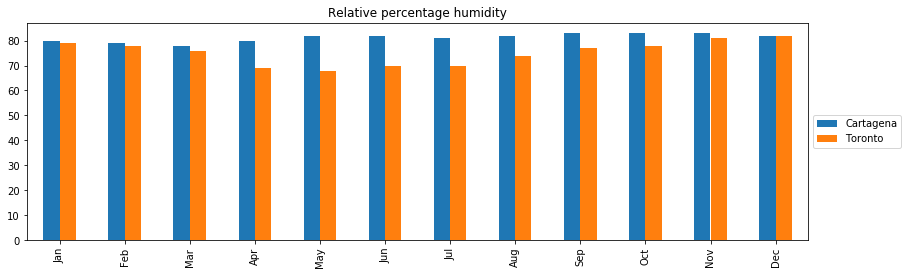

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Cartagena,80,79,78,80,82,82,81,82,83,83,83,82
Toronto,79,78,76,69,68,70,70,74,77,78,81,82


In [105]:
d7 = amt6.T
f7 = plt.figure()
plt.title('Relative percentage humidity', color='black')
d7.plot(kind='bar', ax=f7.gca(),figsize=(14,4))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
amt6

### 7.8. How much does a trip cost in USD dollars?

In [30]:
res  = requests.get("http://hikersbay.com/travel-cost/colombia/cartagenadeindias?lang=en")
soup = BeautifulSoup(res.content,'lxml')

table= soup.find_all('table')[0] 
df_cm0   = pd.read_html(str(table))
df_cm0   = pd.DataFrame(df_cm0[0])
df_cm0["Duration"][0]="Cartagena: 1-day trip"
df_cm0["Duration"][1]="Cartagena: 3-day trip"
df_cm0["Duration"][2]="Cartagena: Week-long trip"

In [31]:
res  = requests.get("http://hikersbay.com/travel-cost/canada/toronto?lang=en")
soup = BeautifulSoup(res.content,'lxml')

table= soup.find_all('table')[0] 
df_tm0   = pd.read_html(str(table))
df_tm0   = pd.DataFrame(df_tm0[0])
df_tm0["Duration"][0]="Toronto: 1-day trip"
df_tm0["Duration"][1]="Toronto: 3-day trip"
df_tm0["Duration"][2]="Toronto: Week-long trip"

In [32]:
df_mm = df_cm0.append(df_tm0, ignore_index=True)

,Duration,Nomad style,Budget travel,Mid-range,Luxury Travel
0,Cartagena: 1-day trip,22 USD,28 USD,52 USD,226 USD
1,Cartagena: 3-day trip,66 USD,85 USD,157 USD,679 USD
2,Cartagena: Week-long trip,153 USD,199 USD,365 USD,"1,500 USD"
3,Toronto: 1-day trip,34 USD,60 USD,105 USD,307 USD
4,Toronto: 3-day trip,101 USD,181 USD,314 USD,922 USD
5,Toronto: Week-long trip,235 USD,423 USD,732 USD,"2,100 USD"


In [33]:
df_mm['Nomad Style']=df_mm['Nomad style'].str.extract(r'(^\d*)')
df_mm['Budget Travel']=df_mm['Budget travel'].str.extract(r'(^\d*)')
df_mm['Mid-Range']=df_mm['Mid-range'].str.extract(r'(^\d*)')
df_mm['Luxury travel']=df_mm['Luxury Travel'].str.extract(r'(^\d*)')

In [34]:
df_mm.drop(['Nomad style'], axis=1, inplace=True)
df_mm.drop(['Budget travel'], axis=1, inplace=True)
df_mm.drop(['Mid-range'], axis=1, inplace=True)
df_mm.drop(['Luxury Travel'], axis=1, inplace=True)
df_mm["Luxury travel"][2]=1500
df_mm["Luxury travel"][5]=2100
df_mm.rename(columns = {"Nomad Style":"Nomad style","Budget Travel":"Budget travel","Mid-Range":"Mid-range"}, inplace = True) 

In [36]:
df_mm['Duration']=df_mm['Duration'].astype(str)
df_mm['Nomad style']=df_mm['Nomad style'].astype(int)
df_mm['Budget travel']=df_mm['Budget travel'].astype(int)
df_mm['Mid-range']=df_mm['Mid-range'].astype(int)
df_mm['Luxury travel']=df_mm['Luxury travel'].astype(int)

In [37]:
df_mm.index = df_mm["Duration"]
df_mm.rename(columns = {"Duration":"duration2","Nomad Style":"Nomad style","Budget Travel":"Budget travel","Mid-Range":"Mid-range"}, inplace = True) 
df_mm.drop(["duration2"], axis=1, inplace=True)
df_mm

,Nomad style,Budget travel,Mid-range,Luxury travel
Duration,,,,
Cartagena: 1-day trip,22,28,52,226
Cartagena: 3-day trip,66,85,157,679
Cartagena: Week-long trip,153,199,365,1500
Toronto: 1-day trip,34,60,105,307
Toronto: 3-day trip,101,181,314,922
Toronto: Week-long trip,235,423,732,2100


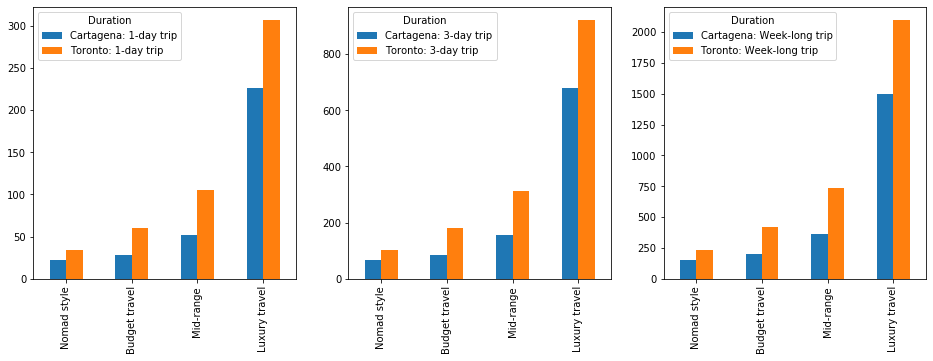

In [59]:
dm=df_mm.T
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16,5))
dm[["Cartagena: 1-day trip","Toronto: 1-day trip"]].plot(ax=axes[0], kind='bar')
dm[["Cartagena: 3-day trip", "Toronto: 3-day trip"]].plot(ax=axes[1], kind='bar')
dm[["Cartagena: Week-long trip", "Toronto: Week-long trip"]].plot(ax=axes[2], kind='bar')